# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Beauty Valen Fajri
- **Email:** beautyfajri@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/valenfajri

## Menentukan Pertanyaan Bisnis

- Bagaimana tingkatan pencemaran udara yang ada pada wilayah Dongsi ?
- Bagaimana kondisi udara tiap tahun pada wilayah Dongsi ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [18]:
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [4]:
df = pd.read_csv('/content/Data_Dongsi.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


### Assessing Data

In [6]:
print(f"Total row: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")
print(f"\nAggregate Statistics : ")
print(df.describe())

Total row: 35064
Total columns: 18

Aggregate Statistics : 
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34314.000000  34511.000000  34401.000000  33463.000000  31867.000000   
mean      86.194297    110.336742     18.531107     53.699443   1330.0

In [7]:
absent_data = df.isnull().sum()
print("\nAbsent Data : ")
print(absent_data)


Absent Data : 
No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


In [8]:
print("\nData Types :")
print(df.dtypes)


Data Types :
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


### Cleaning Data

In [9]:
df.dropna(axis=0, inplace=True)

In [10]:
print("Rows:", df.shape[0])

Rows: 30338


In [11]:
print("\n Attributes :")
print(df.columns.tolist())


 Attributes :
['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']


In [12]:
print("\n Attributes Count:", df.shape[1])


 Attributes Count: 18


In [13]:
print("\n Absent Data:", df.isna().sum().values.sum())


 Absent Data: 0


In [14]:
print("\n Distinct Values :")
print(df.nunique())


 Distinct Values :
No         30338
year           5
month         12
day           31
hour          24
PM2.5        563
PM10         651
SO2          186
NO2          241
CO           115
O3           510
TEMP         933
PRES         592
DEWP         609
RAIN         109
wd            16
WSPM         100
station        1
dtype: int64


## Exploratory Data Analysis (EDA)

In [15]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

most_common_pollutants = {}
for pollutant in pollutants:
    most_common_pollutant = df[pollutant].mode().values[0]
    most_common_pollutants[pollutant] = most_common_pollutant

sorted_pollutants = dict(sorted(most_common_pollutants.items(), key=lambda item: item[1], reverse=True))

print("The Most Frequently Appearing Air Pollutants :")
for pollutant, value in sorted_pollutants.items():
    print(f"{pollutant}: {value}")

The Most Frequently Appearing Air Pollutants :
CO: 300.0
NO2: 20.0
PM10: 5.0
PM2.5: 3.0
SO2: 2.0
O3: 2.0


In [16]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

pollutant_counts = {}
for pollutant in pollutants:
    count = df[pollutant].mode().values[0]
    pollutant_counts[pollutant] = count

most_common_pollutant = max(pollutant_counts, key=pollutant_counts.get)

print(f"The Air Pollutants that Appear Most Frequently in the Dataset are: {most_common_pollutant}")

The Air Pollutants that Appear Most Frequently in the Dataset are: CO


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tingkatan pencemaran udara yang ada pada wilayah Dongsi ?

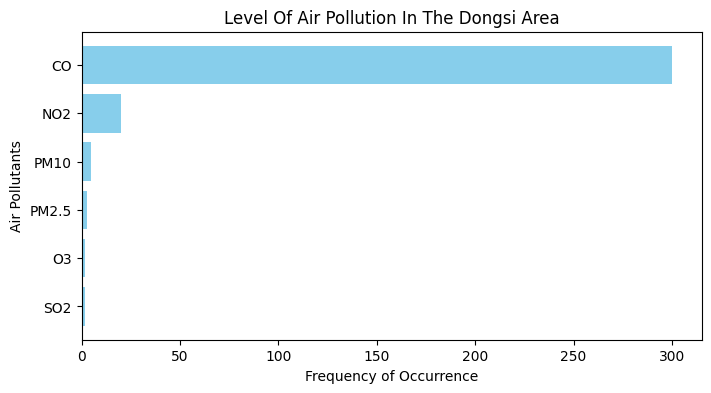

In [19]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

pollutant_counts = df[pollutants].mode().iloc[0]

pollutant_counts_with_pollutants = pd.DataFrame({'Pollutant': pollutants, 'Frequency': pollutant_counts.values})

pollutant_counts_sorted = pollutant_counts_with_pollutants.sort_values(by='Frequency', ascending=True)

# Mengatur tampilan grafik
plt.figure(figsize=(8, 4))
plt.barh(pollutant_counts_sorted['Pollutant'], pollutant_counts_sorted['Frequency'], color='skyblue')
plt.title('Level Of Air Pollution In The Dongsi Area')
plt.xlabel('Frequency of Occurrence')
plt.ylabel('Air Pollutants')
plt.show()


### Pertanyaan 2: Bagaimana kondisi udara tiap tahunnya ?

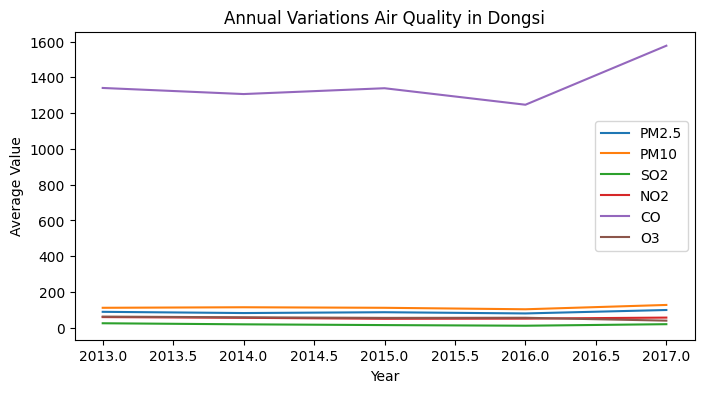

In [21]:
Annual_Information = df.groupby('year').agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})

plt.figure(figsize=(8, 4))
for feature in Annual_Information.columns:
    plt.plot(Annual_Information.index, Annual_Information[feature], label=feature)

plt.title('Annual Variations Air Quality in Dongsi')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Tingkatan pencemaran udara yang ada pada wilayah Dongsi yakni *CO (300), NO2 (20), PM10(5), PM2.5(3), SO2(2),* dan *O3(2)* dengan ***CO*** merupakan polutan udara yang paling sering muncul di wilayah Dongsi berdasarkan Dataset.
- Conclution pertanyaan 2 : Dari analisis tahunan pada Dataset wilayah Dongsi, diketahui ***CO*** memiliki tingkat polusi yang paling tinggi dibandingkan dengan polutan lainnya dengan kualitas yang terus meningkat hingga mencapai puncaknya pada tahun 2017.